In [209]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

In [257]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB,MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import tokenizer_from_json
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import tokenizer_from_json
import tensorflow as tf


In [211]:
df=pd.read_csv('datasets/text.csv')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


##Preparation des donnes

In [212]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


In [214]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [215]:
df.duplicated().sum()

686

In [216]:
df.drop_duplicates(inplace=True)
df.shape

(416123, 2)

In [217]:
Emotion ={0:'Sadness',1:'joy',2:'love',3:'anger',4:'fear',5:'surprise'}
df['Emotion'] = df['label'].map(Emotion)
df.head()

,text,label,Emotion
0,i just feel really helpless and heavy hearted,4,fear
1,ive enjoyed being able to slouch about relax a...,0,Sadness
2,i gave up my internship with the dmrg and am f...,4,fear
3,i dont know i feel so lost,0,Sadness
4,i am a kindergarten teacher and i am thoroughl...,4,fear


In [254]:
# Conversion des émotions en labels numériques
label_encoder = LabelEncoder()
df['emotion_label'] = label_encoder.fit_transform(df['Emotion'])

In [218]:
# Text preprocessing avec NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [219]:
def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()] # ne garder que les mots alphabétiques
    tokens = [word.lower() for word in tokens] # mettre en minuscule
    tokens = [word for word in tokens if not word in stop_words] # suppression des mots vides
    return ' '.join(tokens)

In [220]:
df['text'] = df['text'].apply(preprocess)

In [221]:
df.head()

,text,label,Emotion
0,feel really helpless heavy hearted,4,fear
1,ive enjoyed able slouch relax unwind frankly n...,0,Sadness
2,gave internship dmrg feeling distraught,4,fear
3,dont know feel lost,0,Sadness
4,kindergarten teacher thoroughly weary job take...,4,fear


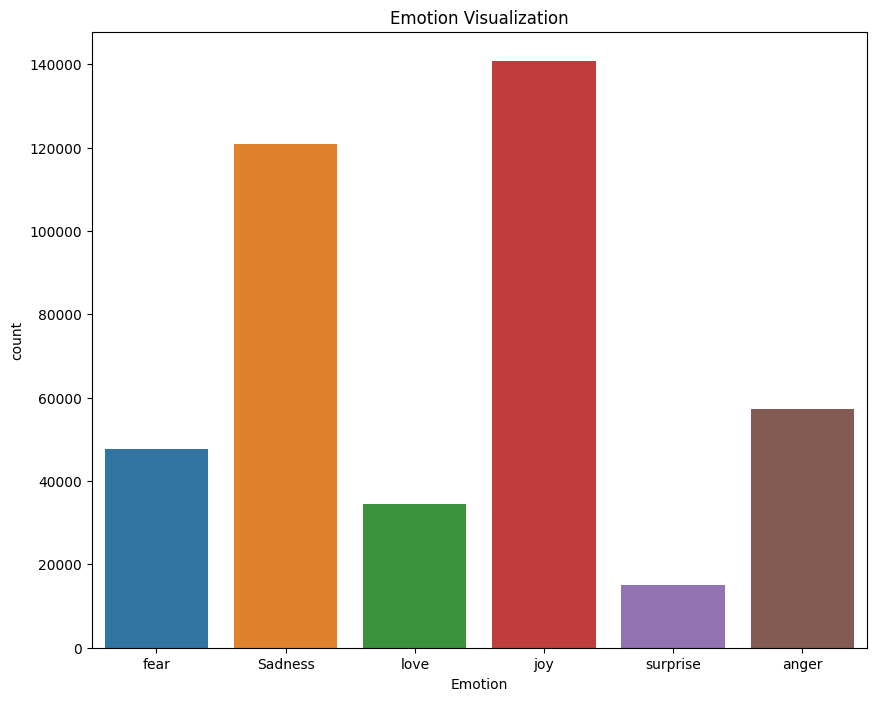

In [222]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Emotion', data=df,hue=df['Emotion'])
plt.title('Emotion Visualization')
plt.show()

In [223]:
# Séparation des variables indépendantes et de la variable cible
X = df['text']
Y = df['label']

In [224]:

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##Aplication des models

In [225]:
# Créer un pipeline avec TfidfVectorizer et ComplementNB
ComplementNB = make_pipeline(TfidfVectorizer(), ComplementNB())

In [226]:
# Entraînement du modèle
ComplementNB.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('complementnb', ComplementNB())])

In [227]:
y_pred_CNB = ComplementNB.predict(X_test)

In [228]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred_CNB)
precision = precision_score(y_test, y_pred_CNB, average='weighted')
f1 = f1_score(y_test, y_pred_CNB, average='weighted')
recall_score=recall_score(y_test,y_pred_CNB,average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("recall:", recall_score)


Accuracy: 0.8857554821267648
Precision: 0.8852134005784036
F1 Score: 0.8853991577973434
recall: 0.8857554821267648


In [229]:
# Création du pipeline avec TfidfVectorizer et MultinomialNB
MultinomialNB = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [230]:
MultinomialNB.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [231]:
y_pred_MNB = MultinomialNB.predict(X_test)

In [232]:
accuracy_MNB = accuracy_score(y_test, y_pred_MNB)
precision_MNB = precision_score(y_test, y_pred_MNB, average='weighted')
f1_MNB = f1_score(y_test, y_pred_MNB, average='weighted')
print("Accuracy:", accuracy_MNB)
print("Precision:", precision_MNB)
print("F1 Score:", f1_MNB)

Accuracy: 0.7652988885551216
Precision: 0.8082641400631047
F1 Score: 0.731746408861913


In [233]:
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Convert the text data to bag-of-words features
X_bow = vectorizer.fit_transform(X)

In [234]:
# Split the data into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X_bow, Y, test_size=0.2, random_state=42)

In [235]:
# Initialize the Logistic Regression model
logistic = LogisticRegression()

In [236]:
# Fitting the model on the training data
LR = logistic.fit(X_train, y_train)

C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [237]:
# Make predictions on the test data
y_pred_RL = LR.predict(X_test)

In [238]:
accuracy_RL = accuracy_score(y_test, y_pred_RL)
precision_RL = precision_score(y_test, y_pred_RL, average='weighted')
f1_RL = f1_score(y_test, y_pred_RL, average='weighted')
print("Accuracy_RL:", accuracy_RL)
print("Precision_RL:", precision_RL)
print("F1 Score_RL:", f1_RL)

Accuracy_RL: 0.891583057975368
Precision_RL: 0.8911682554491966
F1 Score_RL: 0.8913191107278818


In [249]:
# Division du dataset en ensembles d'entraînement, de validation et de test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42) 

In [244]:
# Charger le JSON à partir du fichier
with open('tokenizer_cnn.json') as json_file:
    tokenizer_json = json_file.read()

# Convertir le JSON en tokenizer
tokenizer_cnn = tokenizer_from_json(tokenizer_json)
model_cnn = tf.keras.models.load_model("emotion_detection_CNN.h5")

In [245]:
X_test_sequences_cnn = tokenizer_cnn.texts_to_sequences(X_test)
X_test_sequences_cnn = pad_sequences(X_test_sequences_cnn)

In [246]:
# Prédictions sur l'ensemble de test
y_pred_prob = model_cnn.predict(X_test_sequences_cnn)
y_pred_cnn = y_pred_prob.argmax(axis=-1)

1951/1951 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


In [258]:
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
precision_cnn = precision_score(y_test, y_pred_cnn, average='weighted')
f1_cnn = f1_score(y_test, y_pred_cnn, average='weighted')
print("Accuracy_cnn:", accuracy_cnn)
print("Precision_cnn:", precision_cnn)
print("F1 Score_cnn:", f1_cnn)

Accuracy_cnn: 0.9335138339287717
Precision_cnn: 0.9369563392977484
F1 Score_cnn: 0.9325536971557492


In [259]:
# Division du dataset en ensembles d'entraînement, de validation et de test
Y=df['emotion_label']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42) 

In [260]:

# Charger le JSON à partir du fichier
with open('tokenizer_copy.json') as json_file:
    tokenizer_json = json_file.read()

# Convertir le JSON en tokenizer
tokenizer_rnn = tokenizer_from_json(tokenizer_json)
# Charger le modèle
model_rnn = tf.keras.models.load_model("model_rnn_copy.h5")

In [261]:
X_test_sequences_rnn = pad_sequences(tokenizer_rnn.texts_to_sequences(X_test), maxlen=100)

In [262]:
y_pred_prob = model_rnn.predict(X_test_sequences_rnn)
y_pred_rnn = y_pred_prob.argmax(axis=-1)

1951/1951 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step


In [263]:
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
precision_rnn = precision_score(y_test, y_pred_rnn, average='weighted')
f1_rnn = f1_score(y_test, y_pred_rnn, average='weighted')
print("Accuracy_rnn:", accuracy_rnn)
print("Precision_rnn:", precision_rnn)
print("F1 Score_rnn:", f1_rnn)

Accuracy_rnn: 0.9347153911469264
Precision_rnn: 0.9375668257467141
F1 Score_rnn: 0.9338364213752803


In [4]:
accuracy_adaboost: 0.3665605286872935
accuracy_rnn: 0.9347153911469264
accuracy_cnn: 0.9335138339287717
accuracy_RL: 0.891583057975368
accuracy_MNB: 0.7652988885551216
accuracy_CNB: 0.8857554821267648

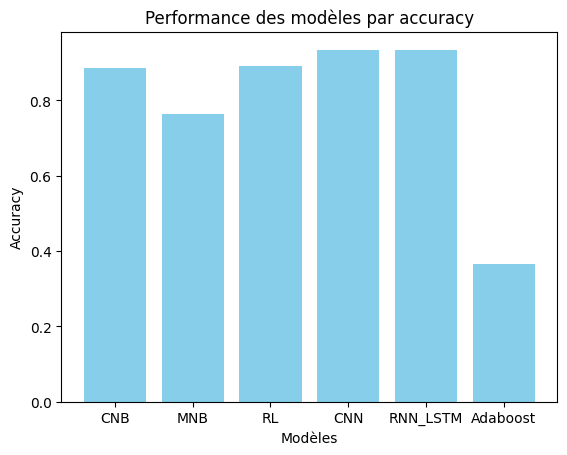

In [11]:
import matplotlib.pyplot as plt

# Précisions des différents modèles
accuracy_adaboost = 0.3665605286872935
accuracy_rnn = 0.9347153911469264
accuracy_cnn = 0.9335138339287717
accuracy_RL = 0.891583057975368
accuracy_MNB = 0.7652988885551216
accuracy_CNB = 0.8857554821267648

# Noms des modèles et leurs précisions correspondantes
modeles = ['CNB', 'MNB', 'RL', 'CNN', 'RNN_LSTM', 'Adaboost']
accuracy = [accuracy_CNB, accuracy_MNB, accuracy_RL, accuracy_cnn, accuracy_rnn, accuracy_adaboost]

# Création du graphique à barres avec couleur bleu ciel
plt.bar(modeles, accuracy, color='skyblue', label='accuracy')

# Étiquettes et titre
plt.xlabel('Modèles')
plt.ylabel('Accuracy')
plt.title('Performance des modèles par accuracy')
plt.show()


